1. liq fit denklemi katsayıları ax+b
-ax+b formatında------ a,b -38.798246074038445 49591.0188670894
2. liq fit denklemi katsayıları cx+d
cx+d formatında-----c,d -135.66324476052208 142816.067470123


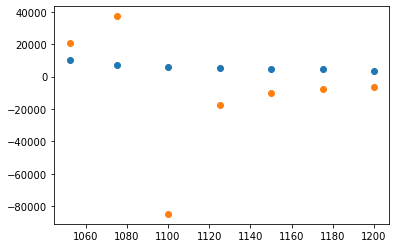

In [3]:
import pandas as pd
#BURAYA FT VE GT ÖBÜR PROGRAMDAN LİST OLARAK ALINACAK
from sympy import *
import matplotlib
import scipy as sp
import sympy as smp
import numpy as np
%matplotlib inline
from scipy.misc import derivative
from scipy.optimize import fsolve
import math
from sympy import symbols,solve,Eq
#G=Symbol('G', real=True)
kesmeG=[];turevG=[];G11=[];G22=[];G33=[];x2=[];y2=[];num=[]
from collections.abc import Iterable
import gc
def flatten(lis):
     for item in lis:
         if isinstance(item, Iterable) and not isinstance(item, str):
             for x in flatten(item):
                 yield x
         else:        
             yield item
L=[];T1=[];T2=[];T3=[];T4=[];AB2=[];AB1=[];AB3=[];AB4=[]
CC=[];VV=[];j=[];tt=[];KK=[];TK=[];K=[];T=[];S=[]
L0L=[];L1L=[];L2L=[];L0BCC=[];L1BCC=[];L2BCC=[];MGLQ=[];LILQ=[];G0MG=[];G0LI=[]
L0HCP=[];L1HCP=[];L2HCP=[];CC=[];VV=[];j=[];tt=[];KK=[];TK=[];K=[];T=[];S=[]
LIQUID=[];BCC=[];HCP=[];DGMIX=[];DGMIXX=[];DGMIXY=[];DGMIXZ=[];DGMIXG=[]
LIQUIDG=[];BCCG=[];HCPG=[];HCPG=[];BCC1G=[];LIQUID1G=[];HCP1G=[];LIQUIDa22=[]
agercek=[];bgercek=[];tgercek=[];agercek1=[];bgercek1=[];tgercek1=[];xx=[]
a=[];b=[];aa=[];bb=[];aaaa=[];bbbb=[];tt=[];tttt=[];fa=[];geb=[];efa=[];gb=[]
G11=[];G22=[];G33=[];G44=[];G111=[];G222=[];G333=[];G444=[];veri=[]
GG=[];GGG=[];GGGG=[];tegetG=[];turevdenkG=[];turevdenk=[];geciciturev=[];ahesap=0
bhesap=0;m1=[];n1=[];ff1=[];gg1=[];model1=[];model2=[];model3=[]
model1a=[];model2a=[];model3a=[];model1b=[];model2b=[];model3b=[]
tgercekdongude=[];tgercekdongudea=[];tgercekdongudeb=[]
tempa=[];tempb=[];ttemp=[];cdc=[];points=[];a2=[];b2=[];f11=[];f21=[];df1=[];df2=[]
ft=0;gt=0;tdongu=[];tdongu1=[]
alfaopt=[];betaopt=[];alfaliq=[];betaliq=[];#print((alfaopt))
omega1ara=[];omega2ara=[];Yft=[];Ygt=[]
# yeni işlem
x2, y2, x1,y1,a,b,x,y,z,m,n,G,ft,gt,o1,o2=symbols('x2 y2 x1 y1 a b x y z m n G ft gt o1 o2', real=True,nonzero=True)
#alfaopt=[0.06,0.04,0.02,0.001];#grafikten okunan raw data
import pandas as pd

data1 = pd.read_excel(r'C:\Users\muhsin.ider\Desktop\ust veriler\alfa+l.xlsx')
data2 = pd.read_excel(r'C:\Users\muhsin.ider\Desktop\ust veriler\l+alfa.xlsx')
data3 = pd.read_excel(r'C:\Users\muhsin.ider\Desktop\ust veriler\beta+l.xlsx')
data4 = pd.read_excel(r'C:\Users\muhsin.ider\Desktop\ust veriler\l+beta.xlsx')
# DOSYA İSİMLERİ DOĞRU KONTROL 30 EKİM
#dfy = pd.DataFrame(data, columns=['y'])
df1 = pd.DataFrame(data1);df2 = pd.DataFrame(data2);df3 = pd.DataFrame(data3);df4 = pd.DataFrame(data4)
alfaopt= df1['x'].values.tolist();tdataalfaliq= df1['y'].values.tolist()
alfaliq= df2['x'].values.tolist()
betaopt= df3['x'].values.tolist()
betaliq= df4['x'].values.tolist()

verisayısı=len(tdataalfaliq)

alfaaaa=alfaopt[:];betabbb=betaopt[:]
#print(alfaaaa,betabbb)
m9=[];n9=[];ftyeni=[];gtyeni=[];m9=[];n9=[];ot=[]
# ot omega t dir
i=0
while i< verisayısı:
    a,b,x,y,z,m,n,G,ft,gt,ot=symbols('a b x y z m n G ft gt ot', real=True,nonzero=True)
    #nonzero=True means "real and not zero"  
    t=tdataalfaliq[i]
    if 298.15<=t<1234:
        G0AG=-7209.512+118.202013*t-23.8463314*t*np.log(t)-(1.790585*10**-3)*t**2-(0.398587*10**-6)*t**3-12011*(t**-1)
        G0CU=-7770.458+130.485235*t-24.112392*t*np.log(t)-(2.65684*10**-3)*t**2+(0.129223*10**-6)*t**3+52478*(t**-1)
        #print(" ag=",G0AG,"  CU=  ",G0CU)
        AGLQ=3815.564 + 109.310993*t - 23.8463314*t*np.log(t) - (1.790585*10**-3)*t**2 - (0.398587*10**-6)*t**3 - 12011*(t**-1)-1033.905*10**-23*t**7
        CULQ=5194.277 + 120.973331*t-24.112392*t*np.log(t)-(2.65684*10**-3)*t**2+(0.129223*10**-6)*t**3+52478*(t**-1)-(584.89*10**-23)*t**7
        # aşağıdaki katsayılar ft=mf2*t*t+bf2*t+cf2
        mf2=-0.0707447613220228;bf2=118.65530076002405;cf2=-22421.81851141554
        # aşağıdaki katsayılar gt=mg2*t*t+bg2*t+cg2
        mg2=-0.0918678181944558; bg2=142.73948914094265;cg2=-21293.411604080553
        ft, gt, ot1, ot2 = symbols('ft gt ot1 ot2')      
        
        # x1= alfa ile liquid verisi, y1=beta ile liquid verisi,
                
        x1=alfaopt[i];y1=alfaliq[i];x2=betaopt[i];y2=betaliq[i]
        ft=mf2*t*t+bf2*t+cf2   
        gt=mg2*t*t+bg2*t+cg2  
       
        alfa=G0CU-G0AG+8.314*t*log(x1/(1-x1))+ft*(1-2*x1)
        beta=G0CU-G0AG+8.314*t*log(x2/(1-x2))+gt*(1-2*x2)
        
        sıvı1=CULQ-AGLQ+8.314*t*log(y1/(1-y1))+o1*(1-2*y1)
        
        sıvı2=CULQ-AGLQ+8.314*t*log(y2/(1-y2))+o2*(1-2*y2)
       
        omega1=(solve(alfa-sıvı1, o1))
        omega2=(solve(beta-sıvı2, o2))
        from sympy import symbols, Eq, solve
        import sympy as sym
        from sympy import *
        from numpy import *
        #***************************************************
        #2 KAsım NOT: bu işlemi eq2 ve df2 için 1238 üzeri veriyi alıp devam ettir. son degerleri 2 3 tane koy ki x=1 de son degerden gecsin
        #burası model1 yani Omega=ax+b DOĞRU
                      
        omega1ara.append(omega1);omega1xx=flatten(omega1ara)
        omega2ara.append(omega2);omega2xx=flatten(omega2ara)
        
        tdongu1=t;tdongu.append(tdongu1)  
        #print("omega1xx=",type(omega1xx),omega1xx)
        #print("omega2xx=",type(omega2xx),omega2xx)
        #print("tdongu=",type(tdongu),tdongu)
        #print("len(tdongu),len(omega1xx),len(omega2xx)",len(tdongu),len(omega1xx),len(omega2xx))
    i=i+1
#xx=(np.array([tdongu,omega1xx,omega2xx]).T)
# 1. derece denklem fit
tvector2= np. array(tdongu,dtype='float');#print("tvector2",type(tvector2),tvector2)
omega1= np. array(omega1xx,dtype='float');#print("omega1",type(omega1),omega1)
omega2= np. array(omega2xx,dtype='float');#print("omega2",type(omega2),omega2)
p1 = np.polyfit( tvector2,omega1, 1);print("1. liq fit denklemi katsayıları ax+b")
a, b = np.polyfit(tvector2,omega1, 1);print("-ax+b formatında------ a,b",a,b)
p2 = np.polyfit( tvector2,omega2, 1);print("2. liq fit denklemi katsayıları cx+d")
c, d = np.polyfit(tvector2,omega2, 1);print("cx+d formatında-----c,d",c,d)

from sympy import *
x=Symbol('x')
for x in tvector2:
    Yft1=a*x+b;Ygt1=c*x+d;#print("type(Yft1)",type(Yft1),x,Yft,Ygt)
    Yft.append(Yft1);Ygt.append(Ygt1);#print("type(Yft)",type(Yft),x,Yft,Ygt)

import matplotlib as plt
from matplotlib import *
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(tvector2,Yft,tvector2,Ygt)
plt.scatter(tdongu,omega1);#plt.plot(tdongu,omega1)
plt.scatter(tdongu,omega2);#plt.plot(tdongu,omega2)
#print("tdongu------omega1ara-----tdongu-----omega2ara")
#print(np.array([tdongu,omega1,tdongu,omega2], dtype=object).T)
#plt.plot(tdongu,omega1,tdongu,omega2)
plt.show()

plt.show() 